# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Phùng Anh Khoa
- Student ID: 19120548

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: Tên của quốc gia
    - Total Cases: Tổng số trường hợp được xác nhận nhiễm COVID-19 ở mỗi quốc gia.
    - New Cases: Đại diện cho số trường hợp mới được báo cáo. Dấu "+" trước một số giá trị cho thấy số ca bệnh đã tăng lên kể từ dữ liệu được báo cáo lần cuối.
    - Total Deaths: Cho biết tổng số ca tử vong do COVID-19 ở mỗi quốc gia.
    - New Deaths: Cột này đại diện cho số ca tử vong mới được báo cáo.
    - Total Recovered: Tổng số người đã khỏi bệnh sau khi mắc bệnh COVID-19 ở mỗi quốc gia.
    - Active Cases: Cột này hiển thị số trường hợp COVID-19 đang hoạt động hiện tại, được tính bằng tổng số trường hợp trừ đi tổng số ca đã hồi phục và tổng số ca tử vong.
    - Critical Cases: Số ca mắc Covid-19 được phân loại là nguy kịch, thường cho thấy bệnh nặng cần được chăm sóc y tế đặc biệt.
    - Total Tests: Tổng số xét nghiệm COVID-19 được thực hiện ở mỗi quốc gia.
    - Population: Dân số của mỗi nước.

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
# raise NotImplementedError('not implemented')

columns_to_drop = ['New Cases', 'New Deaths', 'Critical Cases']
df = df.drop(columns=columns_to_drop)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# TODO: convert data to integer. if the converter returns error, leave it a None
# raise NotImplementedError('not implemented')

object_columns = ['Total Cases',  'Total Deaths',  'Total Recovered', 'Active Cases',  'Total Tests', 'Population']
df[object_columns] = df[object_columns].replace({'\D': ''}, regex=True)
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

- Vì chỉ mới chuyển đổi các dữ liệu ở các cột có kiểu dữ liệu là object thành dữ liệu integer, sẽ có các giá trị mà chứa các kí tự không phải số (ví dụ như giá trị rỗng) sẽ được thay thế bằng NaN trong quá trình biến đổi sang kiểu dữ liệu integer, các giá trị NaN vẫn được coi là giá trị bị thiếu.

In [6]:
# TODO: fill in the missing data with median value
# raise NotImplementedError('not implemented')


non_object_cols = df.select_dtypes(exclude='object').columns
df[non_object_cols] = df[non_object_cols].fillna(df[non_object_cols].median())

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


In [7]:
df

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351
...,...,...,...,...,...,...,...
214,Marshall Islands,4,763.0,4.0,0.0,844275.5,59501
215,Samoa,3,763.0,2.0,1.0,844275.5,199442
216,Vanuatu,3,763.0,1.0,2.0,470.0,312702
217,Micronesia,1,763.0,1.0,0.0,844275.5,115962


**TODO**: Why do we have `float64` here?

- Vì khi sử dụng pd.to_numeric với error='coerce' để chuyển đổi các cột, mọi giá trị không thể chuyển đổi thành số sẽ được thay thế bằng NaN. Vì NaN là biểu diễn dấu phẩy động của các giá trị bị thiếu nên toàn bộ cột được chuyển sang kiểu dtype float64.

In [8]:
# TODO: save your new data frame to `./data/new_data.csv`
# raise NotImplementedError('not implemented')

df.to_csv('./data/new_data.csv', index=False)

In [9]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [10]:
# # un-comment these lines of code
# df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


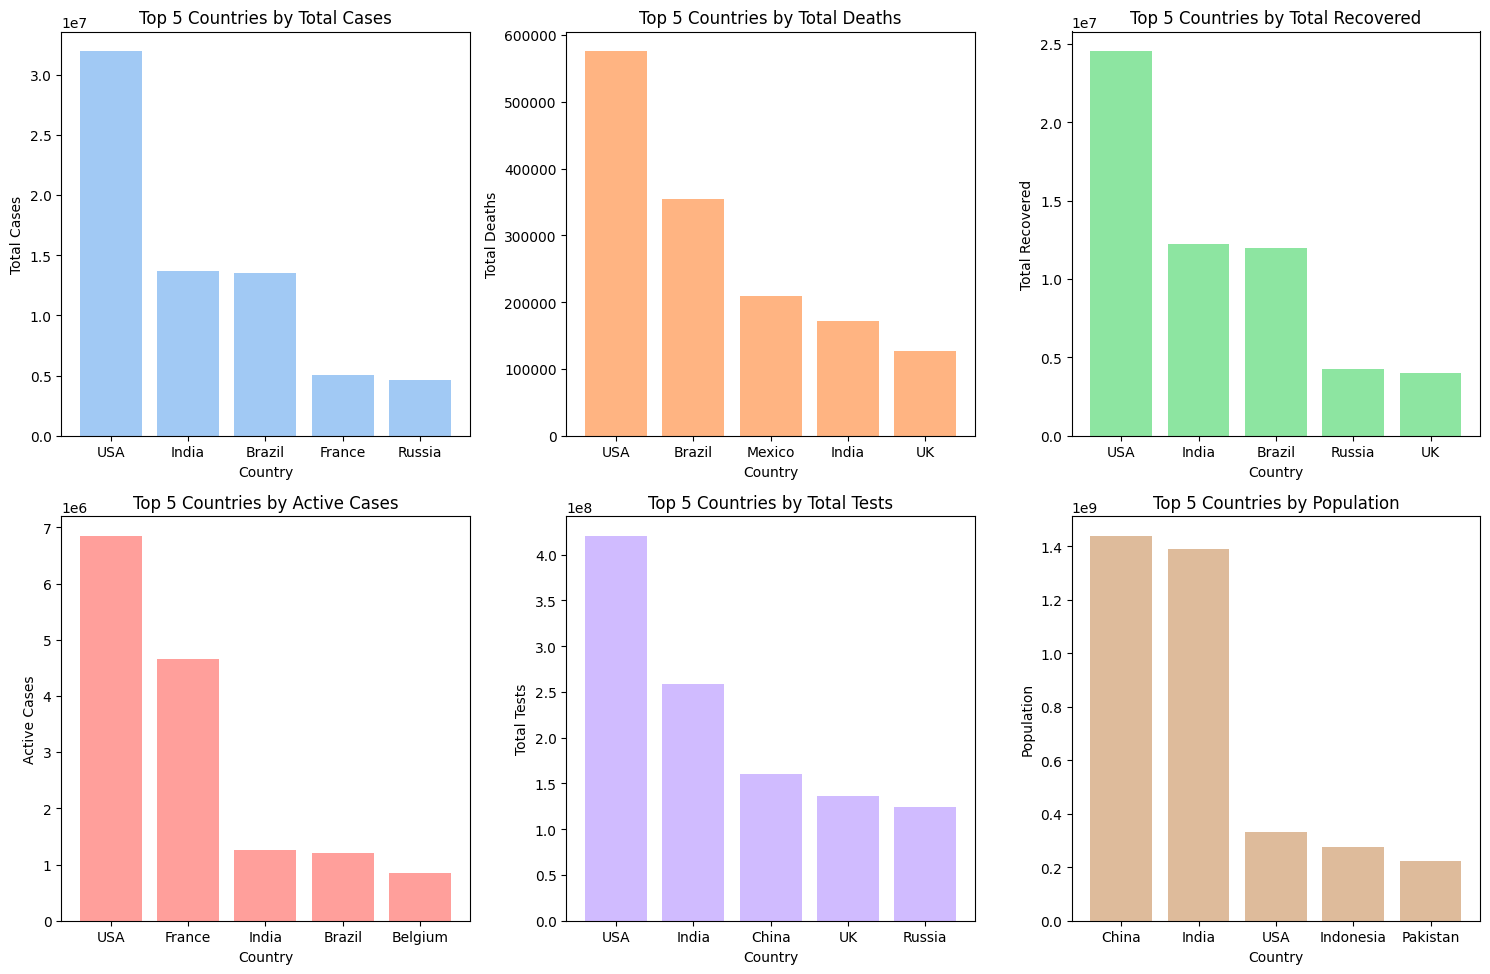

In [11]:
# TODO: draw 6 bar charts
# raise NotImplementedError('not implemented')

fields = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

colors = sn.color_palette('pastel')

for i, (field, color) in enumerate(zip(fields, colors)):

    top_countries = df.sort_values(by=field, ascending=False).head(5)

    axes[i].bar(top_countries['Country Name'], top_countries[field], color=color)
    axes[i].set_title(f'Top 5 Countries by {field}')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(field)

plt.tight_layout()
plt.show()

**TODO**: Comment about the chart

- Trung Quốc và Ấn Độ là hai quốc gia đông dân nhất. Về số lượng, tổng số ca nhiễm,  tử vong, hồi phục và nhiễm bệnh của Ấn Độ cao hơn nhiều so với Trung Quốc. Ấn Độ có khoảng cách giàu nghèo rất lớn và tôn giáo là một trong những thứ làm cho tình hình covid ở Ấn Độ tệ hơn.
- Hoa Kỳ có tổng số ca nhiễm, tổng số ca tử vong, tổng số ca hồi phục, tổng số ca  đang điều trị và số  xét nghiệm cao nhất.
- Hoa Kỳ là quốc gia có dân số hơn 300 triệu người, chỉ đứng sau Trung Quốc và Ấn Độ, nhưng tình hình covid của họ nghiêm trọng hơn rất nhiều so với Trung Quốc và Ấn Độ.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_11212\3074788084.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


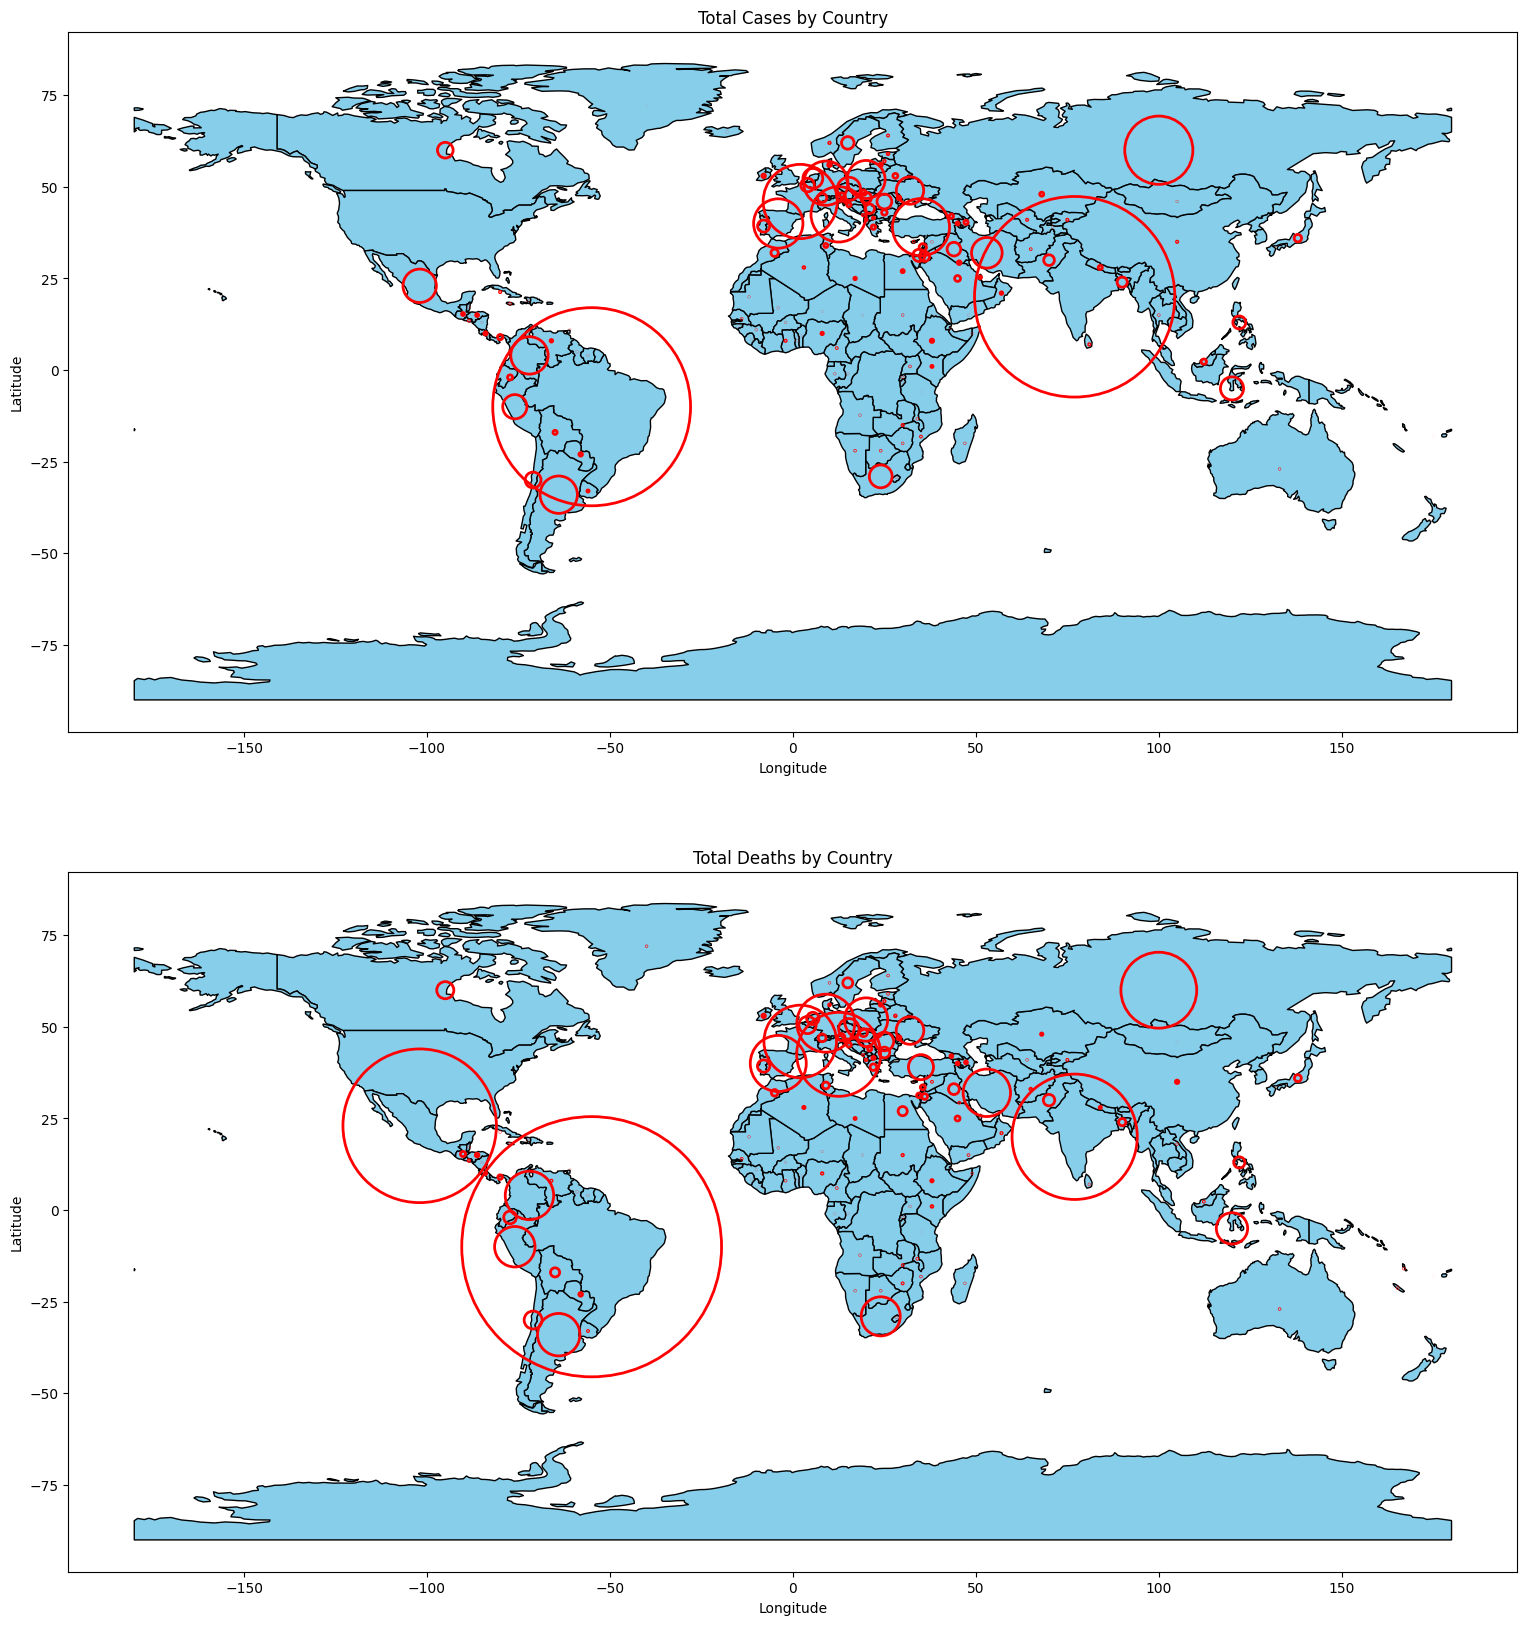

In [13]:
# TODO: draw 2 world map chart using geopandas
# raise NotImplementedError('not implemented')


df.set_index('Country Name', inplace=True)

with open('./data/coord.json') as f:
    data = json.load(f)

# Convert the JSON data to a DataFrame
coord_df = pd.DataFrame(data)
# Load the world map data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the coord data
world = world.merge(coord_df, how='left', left_on='name', right_index=True)
world = world.merge(df[['Total Cases', 'Total Deaths']], how='left', left_on='name', right_index=True)

# Plot the world map with circles for Total Cases
fig, ax = plt.subplots(2, 1, figsize=(60, 20))

world.plot(ax=ax[0], color='skyblue', edgecolor='black')
ax[0].set_title('Total Cases by Country')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')

# Plot the world map with circles for Total Deaths
world.plot(ax=ax[1], color='skyblue', edgecolor='black')
ax[1].set_title('Total Deaths by Country')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')

for index, row in world.iterrows():
    longitude = row['long']
    latitude = row['lat']
    total_cases = row['Total Cases']
    total_deaths = row['Total Deaths']
    circle0 = plt.Circle((longitude, latitude), total_cases*0.000001999, color='red', alpha=1, fill=False, linewidth=2)
    circle1 = plt.Circle((longitude, latitude), total_deaths*0.00009999, color='red', alpha=1, fill=False, linewidth=2)
    ax[0].add_artist(circle0)
    ax[1].add_artist(circle1)

plt.show()                                                                                         

**TODO**: Comment about the chart

- Có thể thấy được tình trạng bệnh dịch ở Mỹ và các quốc gia ở châu Âu rất nghiệm trọng

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

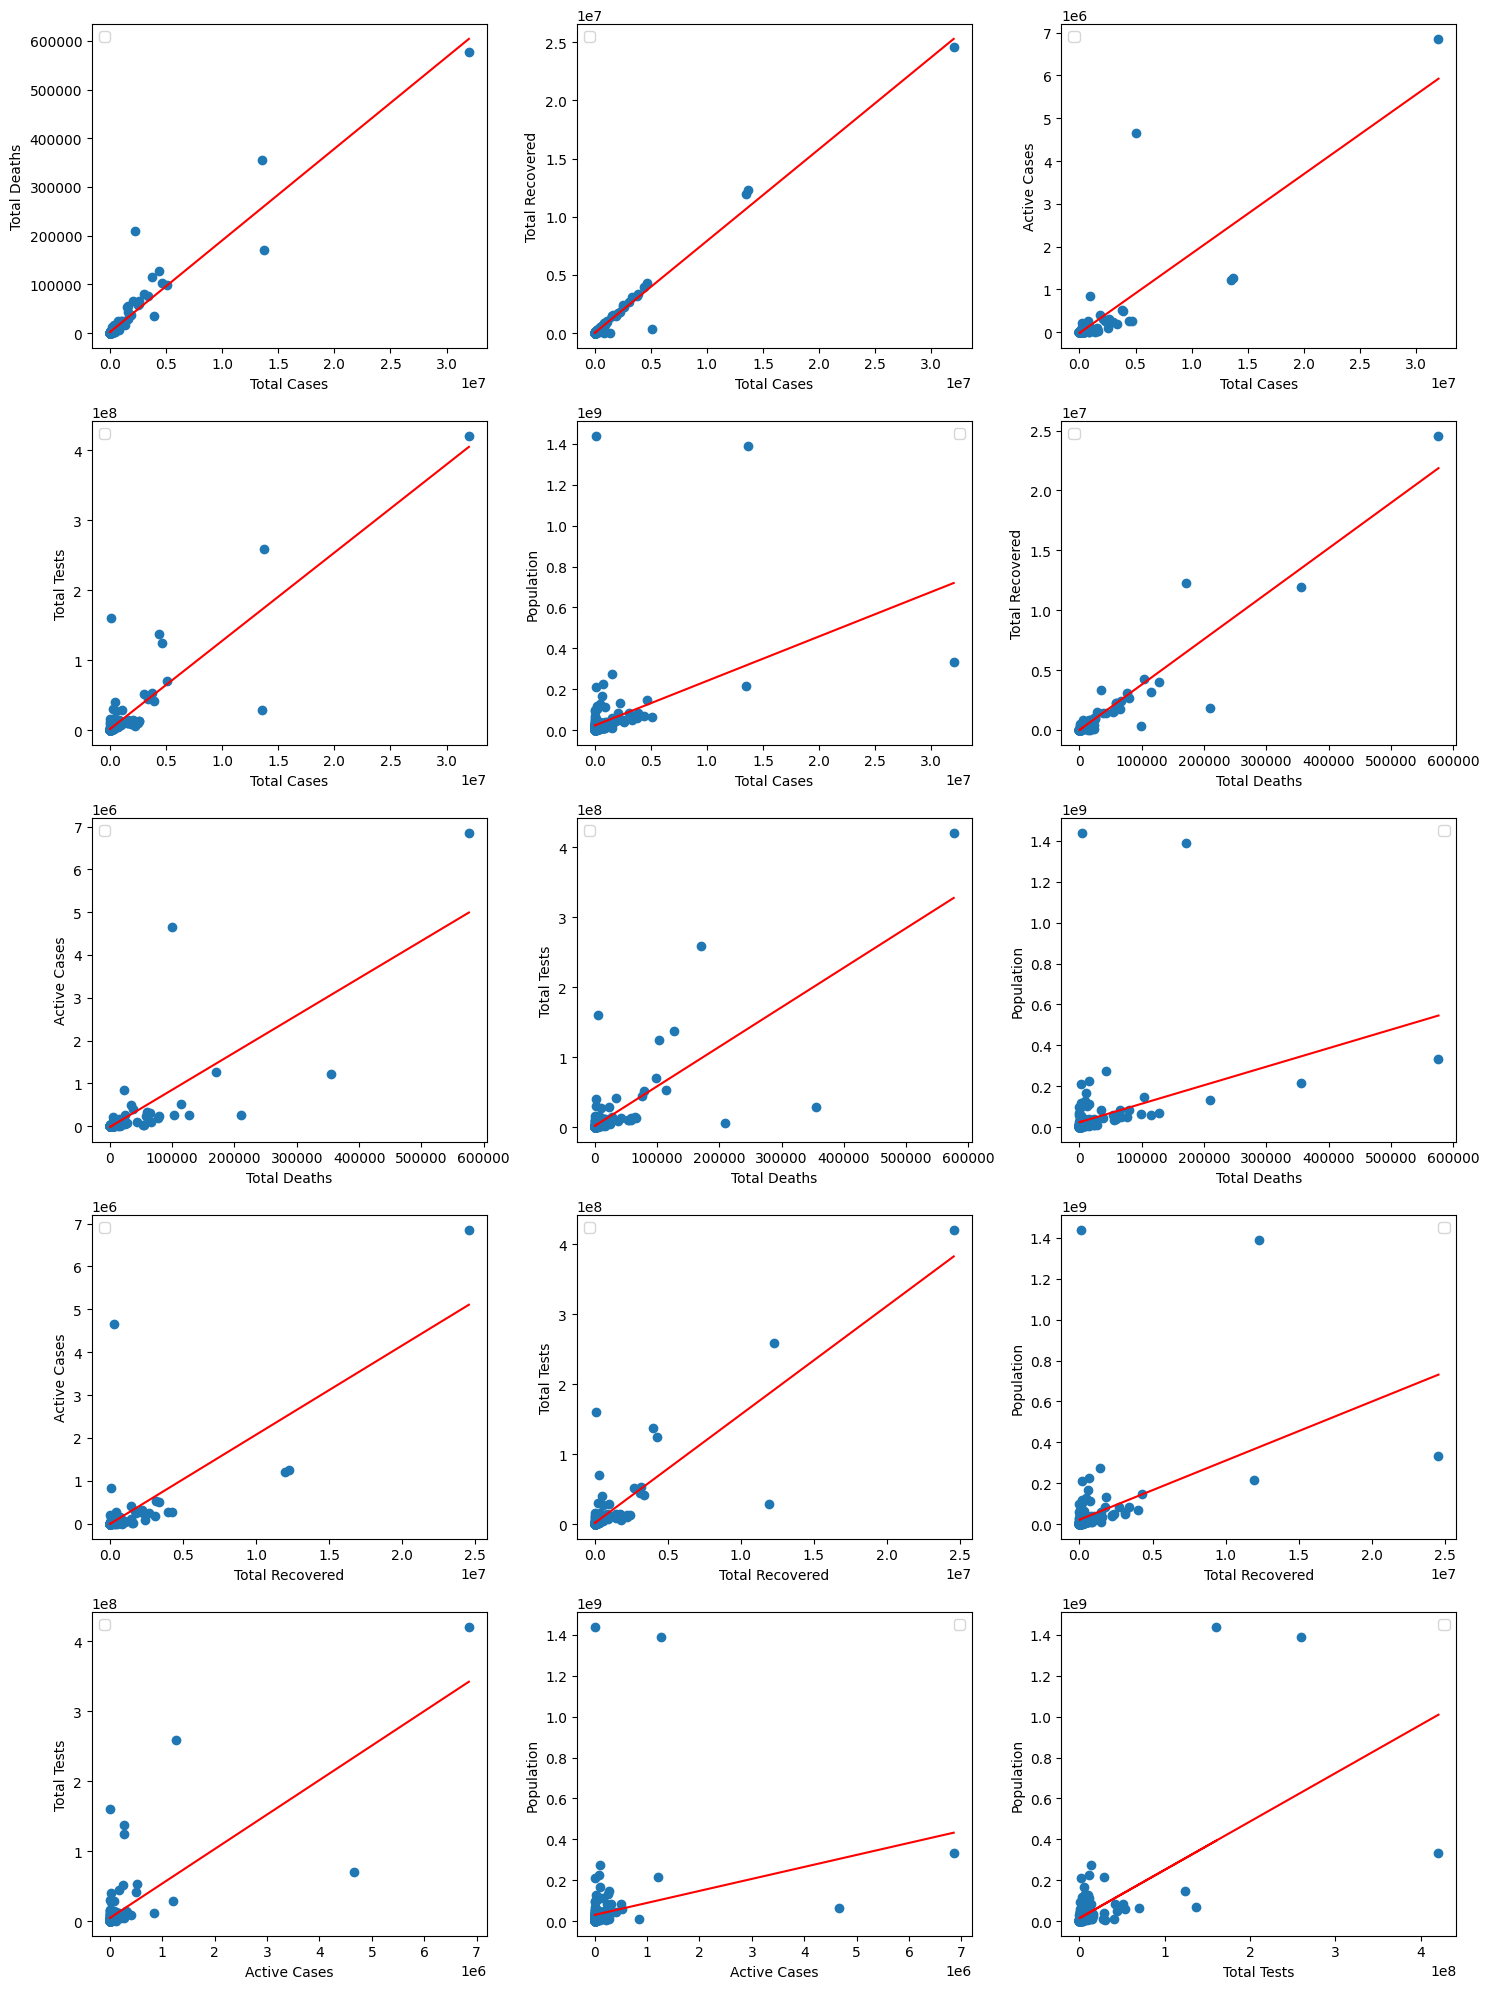

In [14]:
# TODO: scatter stuff
# raise NotImplementedError('not implemented')
numeric_columns = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

index = 0
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        x = df[numeric_columns[i]]
        y = df[numeric_columns[j]]

        cov_xy = ((x - x.mean()) * (y - y.mean())).sum() / len(x)
        std_x = x.std()
        std_y = y.std()

        r = cov_xy / (std_x * std_y)

        slope = r * std_y / std_x
        intercept = y.mean() - slope * x.mean()

        ax = axes[index // 3, index % 3]
        ax.scatter(x, y)
        ax.set_xlabel(numeric_columns[i])
        ax.set_ylabel(numeric_columns[j])

        ax.plot(x, slope * x + intercept, color='red')
        ax.legend()

        index += 1

plt.tight_layout()
plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

*** Có thể thấy được từ biểu đồ các đặc trưng nào có mối quan hệ đồng biến
- Total Cases và Total Deaths
- Total Cases và Total Recovered
- Total Cases và Total Tests
- Total Deaths và Total Recovered

*** Còn các plot khác dường như không có sự tương quan nào

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

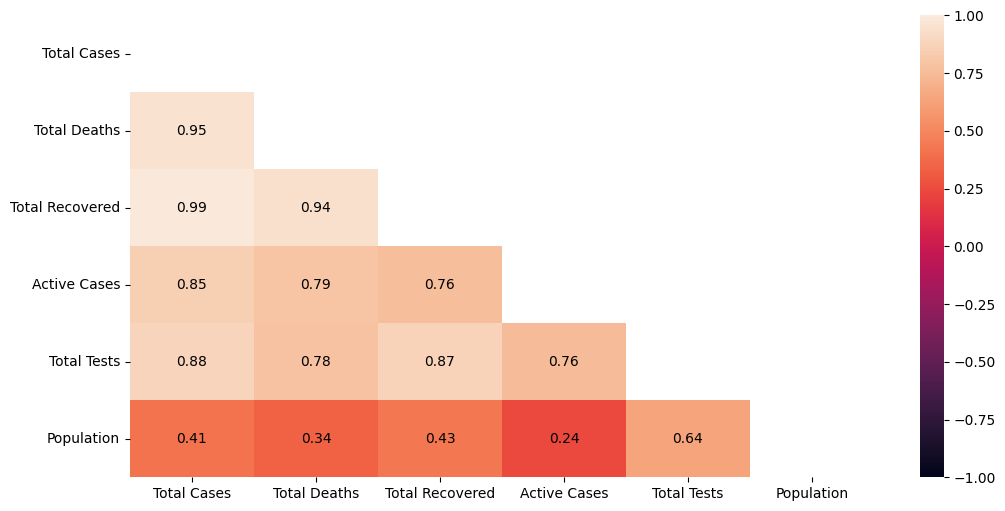

In [15]:
# TODO: create heatamp
# raise NotImplementedError('not implemented')
corr_matrix = df[numeric_columns].corr()

corr_values = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype('bool'))

heatmap = sn.heatmap(corr_values, vmin=-1, vmax=1)
for i in range(len(corr_values)):
    for j in range(len(corr_values)):
        if not pd.isna(corr_values.iloc[i, j]):
            heatmap.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr_values.iloc[i, j]), ha='center', va='center', color='black')

plt.xticks(rotation=0)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

Dataloader là một thành phần thiết yếu trong các mô hình học máy và chúng phục vụ một số mục đích:

- Batch Processing: Training một neural network trên toàn bộ tập dữ liệu cùng một lúc có thể không khả thi do tài nguyên bộ nhớ hạn chế. Dataloader cho phép chúng tôi xử lý dữ liệu theo batch nhỏ hơn, giúp đào tạo mô hình trên các tập dữ liệu lớn.

- Shuffling: Trong quá trình đào tạo, điều quan trọng là phải trình bày dữ liệu cho mô hình theo thứ tự ngẫu nhiên. Điều này giúp ngăn mô hình học các mẫu cụ thể theo thứ tự của dữ liệu và thúc đẩy khả năng khái quát hóa tốt hơn. Dataloader thường có tùy chọn xáo trộn dữ liệu trước mỗi epoch.

- Parallelization: Phần cứng hiện nay, chẳng hạn như GPU, được thiết kế để xử lý song song. Dataloader có thể tải và xử lý trước các batch một cách hiệu quả song song, điều này rất quan trọng để đạt được thời gian đào tạo nhanh hơn.

- Data Transformation: Dataloader có thể áp dụng các chuyển đổi cho dữ liệu đầu vào một cách nhanh chóng. Những chuyển đổi này có thể bao gồm resizing, cropping, normalization và các bước tiền xử lý khác. Ví dụ, trong các tác vụ thị giác máy tính, hình ảnh thường được thay đổi kích thước và chuẩn hóa trước khi đưa vào mô hình.

- Ease of Use: Dataloader đơn giản hóa quá trình quản lý và lặp lại các tập dữ liệu. Chúng cung cấp một giao diện có thể lặp lại, giúp dễ dàng tích hợp với các vòng đào tạo. Ngoài ra, chúng xử lý các khía cạnh như batching, shuffling, and parallelization, cho phép các nhà phát triển tập trung hơn vào việc xây dựng và đào tạo các mô hình.

Trong PyTorch, lớp DataLoader thường được sử dụng để tạo một tập dữ liệu có thể lặp lại. Nó quan tâm đến các khía cạnh được đề cập và cung cấp một cách thuận tiện để tải và xử lý trước dữ liệu trong quá trình đào tạo. Nó đóng một vai trò quan trọng trong quy trình đào tạo, giúp hợp lý hóa quá trình cung cấp dữ liệu cho mô hình trong mỗi lần lặp của vòng đào tạo.

In [16]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32

training_data = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testing_data = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle=False)

# raise NotImplementedError('not implemented')

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

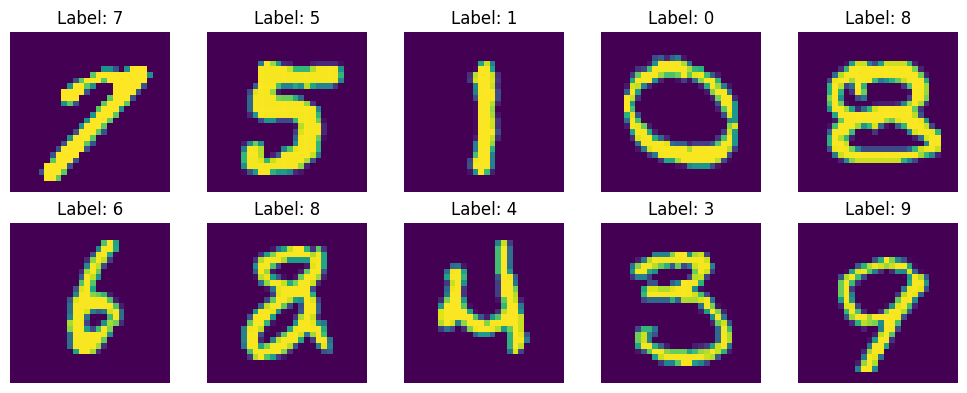

In [17]:
# TODO: visualize 10 random samples
# raise NotImplementedError('not implemented')
random_indices = np.random.choice(len(training_data), size=10, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    index = random_indices[i]
    image, label = training_data[index]
    ax.imshow(image.squeeze())
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [18]:
from torchvision import transforms
import torch.nn.functional as F

In [19]:
# TODO: create Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')

class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(20, 20, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(20 * 7 * 7, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 20 * 7 * 7) 
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

mnist_fc_model = Mnist_FC()
mnist_cnn_model = Mnist_CNN()


### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

Parameters của hàm train:
- dataloader: Đây là PyTorch DataLoader cung cấp các batch dữ liệu đào tạo.
- model: Mô hình mạng neuron đang được huấn luyện.
- loss_fn: Hàm loss được sử dụng để tính toán tổn thất giữa dự đoán mô hình và thực tế.
- optimizer: Thuật toán tối ưu hóa được sử dụng để cập nhật trọng số của mô hình trong quá trình đào tạo.

Parameters của hàm test:
- dataloader: Đây là PyTorch DataLoader cung cấp các batch dữ liệu đào tạo.
- model: Mô hình mạng neuron đang được đánh giá.

torch.no_grad() trong hàm test:
- Trong PyTorch, torch.no_grad() được sử dụng để hủy kích hoạt tính toán độ dốc. Trong giai đoạn thử nghiệm (đánh giá), chúng ta không quan tâm đến việc cập nhật trọng số của mô hình; chúng ta chỉ muốn chuyển tiếp dữ liệu qua mạng để có được dự đoán.

In [20]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0.0
    correct_predictions = 0

    for data, target in dataloader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = output.max(1)
        correct_predictions += predicted.eq(target).sum().item()

    average_loss = total_loss / len(dataloader.dataset)
    accuracy = correct_predictions / len(dataloader.dataset)

    return average_loss, accuracy

def test(dataloader, model):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)

            output = model(data)
            loss = loss_fn(output, target)

            total_loss += loss.item()
            _, predicted = output.max(1)
            correct_predictions += predicted.eq(target).sum().item()

    average_loss = total_loss / len(dataloader.dataset)
    accuracy = correct_predictions / len(dataloader.dataset)

    return average_loss, accuracy

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

Loss Functions:
- Mean Squared Error (MSE): Được sử dụng cho các bài toán hồi quy.
- Binary Cross-Entropy Loss (BCE Loss): Thường được sử dụng cho các vấn đề phân loại nhị phân.
- Categorical Cross-Entropy Loss: Được sử dụng cho các vấn đề phân loại nhiều lớp.
- Huber Loss: Tương tự như Mean Squared Error nhưng ít nhạy cảm hơn với các giá trị ngoại lệ.
- Hinge Loss: Được sử dụng trong các máy vectơ hỗ trợ và cho các vấn đề phân loại dựa trên lề.
- Kullback-Leibler Divergence (KL Divergence): Đo lường mức độ phân kỳ của một phân bố xác suất với phân bố xác suất dự kiến ​​thứ hai.
- Triplet Margin Loss: Được sử dụng trong các mạng bộ ba để học các phần nhúng.

Optimizers:
- Stochastic Gradient Descent (SGD): Thuật toán tối ưu hóa cơ bản cập nhật trọng số dựa trên độ dốc của tổn thất đối với các tham số.
- Adam: Một thuật toán tối ưu hóa thích ứng kết hợp các ý tưởng từ RMSprop và Momentum. Được sử dụng rộng rãi trong học sâu.
- Adagrad: Điều chỉnh tốc độ học tập riêng cho từng tham số.
- RMSprop: Root Mean Square Propagation, điều chỉnh tốc độ học tập cho từng tham số dựa trên mức trung bình của các gradient bình phương gần đây.
- Adadelta: Một phần mở rộng của Adagrad nhằm tìm cách giảm tốc độ học tập đơn điệu, tích cực.
- Nadam: Nesterov-accelerated Adaptive Moment Estimation, một phần mở rộng của Adam với động lượng Nesterov.
- L-BFGS: Limited-memory Broyden-Fletcher-Goldfarb-Shanno, một thuật toán tối ưu hóa gần như Newton được sử dụng cho các tập dữ liệu cỡ vừa và nhỏ.

In [21]:

# define model

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer_fc = torch.optim.SGD(mnist_fc_model.parameters(), lr=learning_rate)
optimizer_cnn = torch.optim.SGD(mnist_cnn_model.parameters(), lr=learning_rate)

history_fc = {'train': [], 'test': []}
history_cnn = {'train': [], 'test': []}

# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')
for epoch in range(1, 21):
    print(f'\nEpoch {epoch}/{20} for Mnist_FC:')
    
    train_loss, train_accuracy = train( train_dataloader,mnist_fc_model, loss_fn, optimizer_fc)
    history_fc['train'].append(train_accuracy)
    
    test_loss, test_accuracy = test( test_dataloader,mnist_fc_model)
    history_fc['test'].append(test_accuracy)
    
    print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}')

for epoch in range(1, 21):
    print(f'\nEpoch {epoch}/{20} for Mnist_CNN:')
    
    train_loss, train_accuracy = train( train_dataloader,mnist_cnn_model, loss_fn, optimizer_cnn)
    history_cnn['train'].append(train_accuracy)
    
    test_loss, test_accuracy = test( test_dataloader,mnist_cnn_model)
    history_cnn['test'].append(test_accuracy)
    
    print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Testing Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}')

print('\nFinal Accuracies:')
print('Mnist_FC - Training Accuracy:', history_fc['train'][-1])
print('Mnist_FC - Testing Accuracy:', history_fc['test'][-1])
print('Mnist_CNN - Training Accuracy:', history_cnn['train'][-1])
print('Mnist_CNN - Testing Accuracy:', history_cnn['test'][-1])


Epoch 1/20 for Mnist_FC:


Training Loss: 0.0703, Accuracy: 0.3260, Testing Loss: 0.0680, Accuracy: 0.5885

Epoch 2/20 for Mnist_FC:
Training Loss: 0.0635, Accuracy: 0.6440, Testing Loss: 0.0569, Accuracy: 0.7055

Epoch 3/20 for Mnist_FC:
Training Loss: 0.0476, Accuracy: 0.7296, Testing Loss: 0.0373, Accuracy: 0.7889

Epoch 4/20 for Mnist_FC:
Training Loss: 0.0310, Accuracy: 0.8020, Testing Loss: 0.0251, Accuracy: 0.8260

Epoch 5/20 for Mnist_FC:
Training Loss: 0.0225, Accuracy: 0.8329, Testing Loss: 0.0194, Accuracy: 0.8525

Epoch 6/20 for Mnist_FC:
Training Loss: 0.0184, Accuracy: 0.8538, Testing Loss: 0.0164, Accuracy: 0.8687

Epoch 7/20 for Mnist_FC:
Training Loss: 0.0160, Accuracy: 0.8682, Testing Loss: 0.0146, Accuracy: 0.8803

Epoch 8/20 for Mnist_FC:
Training Loss: 0.0145, Accuracy: 0.8773, Testing Loss: 0.0134, Accuracy: 0.8871

Epoch 9/20 for Mnist_FC:
Training Loss: 0.0135, Accuracy: 0.8839, Testing Loss: 0.0125, Accuracy: 0.8925

Epoch 10/20 for Mnist_FC:
Training Loss: 0.0127, Accuracy: 0.8888, Test

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

Model CNN:

Tương tự như mô hình FC, biểu đồ mô tả xu hướng tăng dần về cả độ chính xác trong huấn luyện và kiểm tra với các giai đoạn tăng dần. Điều này cho thấy việc học hỏi thành công từ dữ liệu và khả năng phục hồi chống lại tình trạng overfitting trong mô hình CNN. Độ chính xác của thử nghiệm luôn duy trì ở mức cao gần với độ chính xác trong huấn luyện, thể hiện độ tin cậy và khả năng khái quát hóa hiệu quả. Sự hội tụ trong quá trình đào tạo được quan sát thấy sau khoảng 10 epoch.

Model FC:

Biểu đồ minh họa sự gia tăng ổn định về độ chính xác trong cả quá trình huấn luyện và kiểm tra khi số lượng epoch tăng lên. Điều này cho thấy việc học tập hiệu quả từ dữ liệu và không có vấn đề overfitting trong mô hình FC. Độ chính xác của thử nghiệm vẫn luôn ở mức cao và phù hợp chặt chẽ với độ chính xác của quá trình đào tạo, cho thấy độ chắc chắn và khả năng khái quát hóa mạnh mẽ. Sự hội tụ trong quá trình đào tạo xảy ra vào khoảng epoch 12



Mô hình CNN luôn vượt trội hơn mô hình FC về độ chính xác trên tập huấn luyện.

Mô hình CNN luôn vượt trội hơn mô hình FC về độ chính xác trên tập thử nghiệm.

Tóm lại, cả hai mô hình đều thể hiện hiệu suất mạnh mẽ và sự phát triển tích cực trong quá trình đào tạo, thể hiện khả năng khái quát hóa hiệu quả đối với dữ liệu mới. Tuy nhiên, về tổng thể, mô hình CNN thể hiện khả năng vượt trội trong việc học các tính năng từ dữ liệu ảnh, mang lại hiệu quả phân loại ảnh tốt hơn so với mô hình FC.

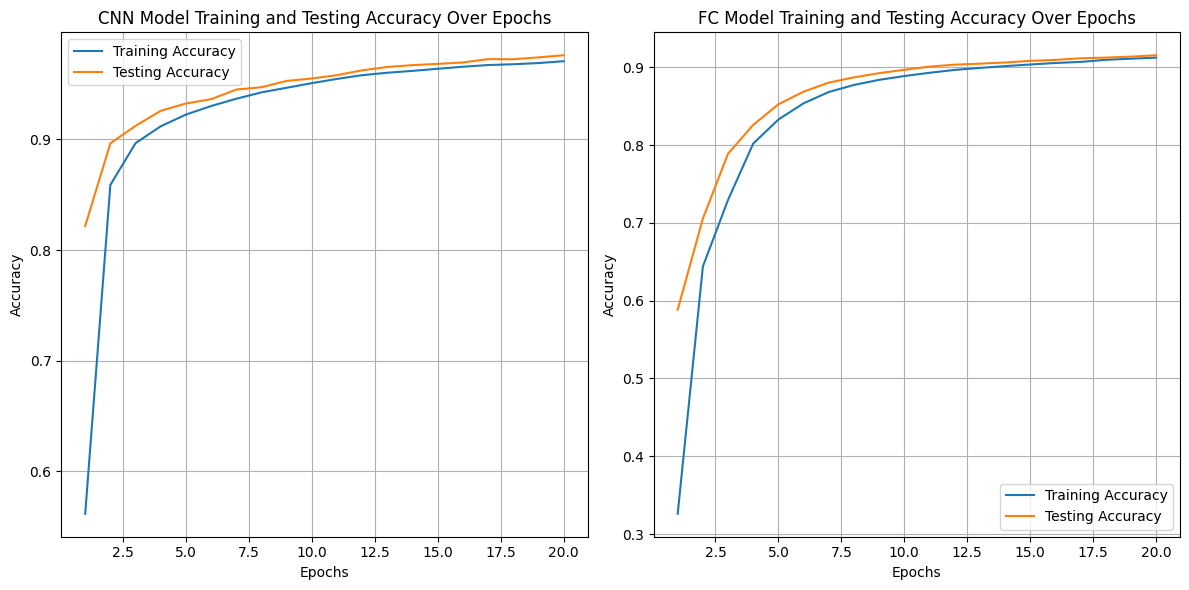

In [22]:
# TODO: visualize the history
# raise NotImplementedError('not implemented')

epochs = list(range(1, 21))  
train_acc_cnn = history_cnn['train']
test_acc_cnn = history_cnn['test']
train_acc_fc = history_fc['train']
test_acc_fc = history_fc['test']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_cnn, label='Training Accuracy')
plt.plot(epochs, test_acc_cnn, label='Testing Accuracy')
plt.title('CNN Model Training and Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_fc, label='Training Accuracy')
plt.plot(epochs, test_acc_fc, label='Testing Accuracy')
plt.title('FC Model Training and Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()


- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab